### Importing the Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

### Loading the Data

In [2]:
# Loading the data using pandas
data = pd.read_csv('Final_Transportation.csv')

### Statistical Summary Of Data

#### Checking for Missing Values

In [3]:
# Check for missing values
data.isnull().sum()

User Name                       0
Mode of Transport               0
Distance Traveled (In Miles)    0
Frequency(Per Week)             0
Start Location                  0
End Location                    0
Fuel Type                       0
Fuel Efficiency                 0
Monthly Emissions (kg CO2)      0
dtype: int64

#### Checking for Data Types

In [4]:
# Check data types
data.dtypes

User Name                        object
Mode of Transport                object
Distance Traveled (In Miles)      int64
Frequency(Per Week)               int64
Start Location                   object
End Location                     object
Fuel Type                        object
Fuel Efficiency                   int64
Monthly Emissions (kg CO2)      float64
dtype: object

In [5]:
# Statistical summary
data.describe()

,Distance Traveled (In Miles),Frequency(Per Week),Fuel Efficiency,Monthly Emissions (kg CO2)
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,13.641000,3.014000,25.14300,58.368620
std,7.245455,1.419796,3.02584,43.792365
min,1.000000,1.000000,20.00000,1.170000
25%,7.000000,2.000000,23.00000,24.000000
50%,14.000000,3.000000,25.00000,46.930000
75%,20.000000,4.000000,27.00000,86.400000
max,40.000000,5.000000,30.00000,209.520000


In [6]:

# Emission factors for different fuel types and modes of transport
emission_factors_car = {
    "gasoline": 2.31,  # average emission factor for gasoline cars
    "electric": 0.5    # estimated average emission factor for electric cars
}

emission_factors_bike = {
    "gasoline": 1.20,  # average emission factor for gasoline bikes
    "electric": 0.13   # estimated average emission factor for electric bikes
}
 

### Data Visualization

#### Correlation Heatmap

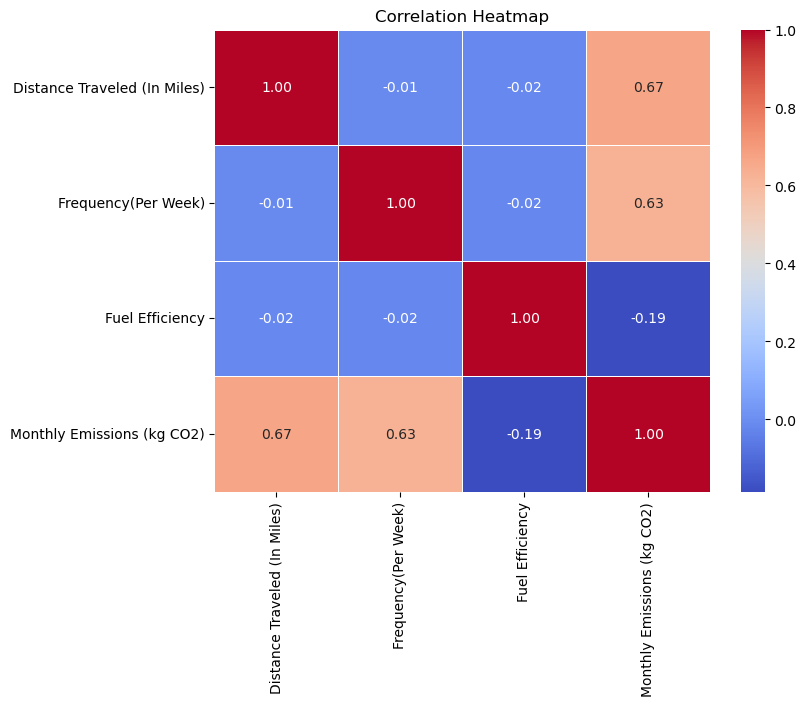

In [7]:
correlation_matrix = data.corr(numeric_only=True)  # Add numeric_only parameter
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


### Applying the Algorithm

In [8]:
label_encoders = {}
for col in ['Mode of Transport', 'Fuel Type']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Features and target variable
features = data[['Distance Traveled (In Miles)', 'Fuel Type', 'Fuel Efficiency']]
target = data['Monthly Emissions (kg CO2)']



In [9]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train, y_train)
# Making predictions on the entire dataset
predictions = model_lin_reg.predict(X_train)

# Calculate accuracy (R-squared)
accuracy = model_lin_reg.score(X_train, y_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)
r2 = r2_score(y_train, predictions)
explained_variance = explained_variance_score(y_train, predictions)

#Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Explained Variance Score:", explained_variance)

Accuracy (R-squared): 0.4842689651452756
Mean Squared Error: 1037.3215194886857
Mean Absolute Error: 24.635013498367744
R-squared Score: 0.4842689651452756
Explained Variance Score: 0.4842689651452755


### Gradient Boosting Regressor

In [11]:
# Creating and fitting the Gradient Boosting Regressor model
model_gradient_boosting = GradientBoostingRegressor(random_state=42)
model_gradient_boosting.fit(X_train, y_train)

# Making predictions on the test set
predictions = model_gradient_boosting.predict(X_train)

#Accuracy
accuracy = model_gradient_boosting.score(X_train, y_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)
r2 = r2_score(y_train, predictions)
explained_variance = explained_variance_score(y_train, predictions)

# Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Explained Variance Score:", explained_variance)

Accuracy (R-squared): 0.5856436245987934
Mean Squared Error: 833.4204379654591
Mean Absolute Error: 22.147990022039764
R-squared Score: 0.5856436245987934
Explained Variance Score: 0.5856436245987934


### Random Forest Regressor model

In [12]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Making predictions on the entire dataset
predictions = rf_model.predict(X_train)

# Calculating the accuracy 
accuracy = rf_model.score(X_train, y_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)
r2 = r2_score(y_train, predictions)
#Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Accuracy (R-squared): 0.7338311512146474
Mean Squared Error: 535.3617603027343
Mean Absolute Error: 16.729179742338566
R-squared Score: 0.7338311512146474


### Decision Tree Regressor model

In [13]:
# Creating and fitting the Decision Tree Regressor model
model_decision_tree = DecisionTreeRegressor(random_state=42)
model_decision_tree.fit(X_train, y_train)

# Making predictions on the entire dataset
predictions = model_decision_tree.predict(X_train)

# Calculate accuracy (R-squared)
accuracy = model_decision_tree.score(X_train, y_train)

# Evaluating the model
mse = mean_squared_error(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)
r2 = r2_score(y_train, predictions)
explained_variance = explained_variance_score(y_train, predictions)

#Printing the Accuracy
print("Accuracy (R-squared):", accuracy)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)
print("Explained Variance Score:", explained_variance)

Accuracy (R-squared): 0.7554326741629036
Mean Squared Error: 491.91328989166664
Mean Absolute Error: 14.346244166666665
R-squared Score: 0.7554326741629036
Explained Variance Score: 0.7554326741629036


### Opting for the Decision Tree Regressor model due to its superior performance in evaluation metrics compared to other algorithms.

### Some more Visualizations

### Actual vs Predicted Monthly Emissions

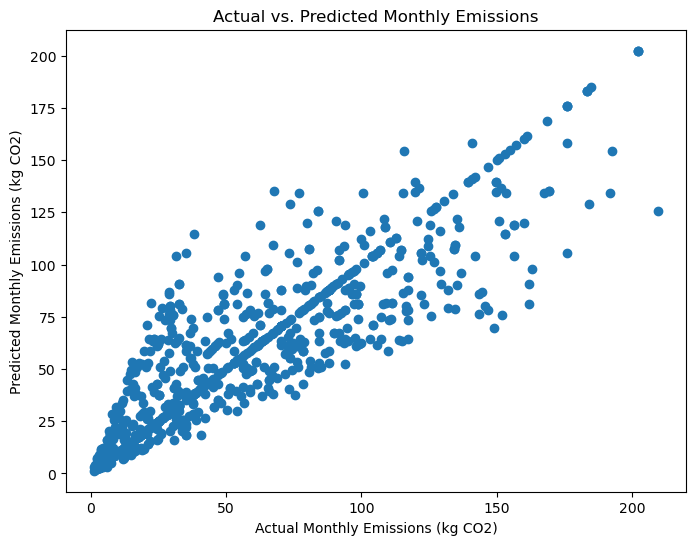

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions)
plt.xlabel('Actual Monthly Emissions (kg CO2)')
plt.ylabel('Predicted Monthly Emissions (kg CO2)')
plt.title('Actual vs. Predicted Monthly Emissions')
plt.show()

### Comparison between Emission factors

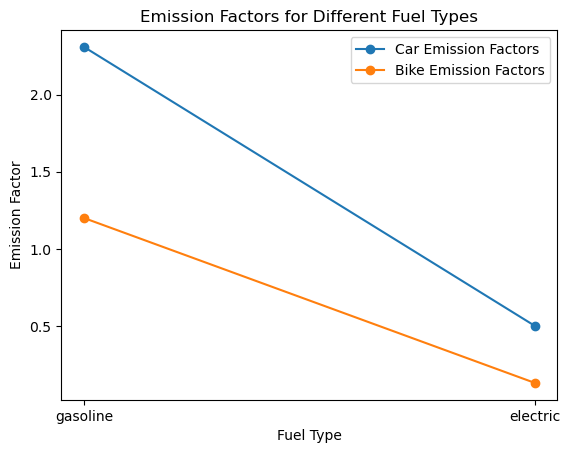

In [15]:
plt.plot(emission_factors_car.values(), label='Car Emission Factors', marker='o')
plt.plot(emission_factors_bike.values(), label='Bike Emission Factors', marker='o')
plt.xticks(range(len(emission_factors_car)), emission_factors_car.keys())
plt.title('Emission Factors for Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Emission Factor')
plt.legend()
plt.show()   

### Pie Chart Illustrating the Comparison of Gasoline and Electric Users

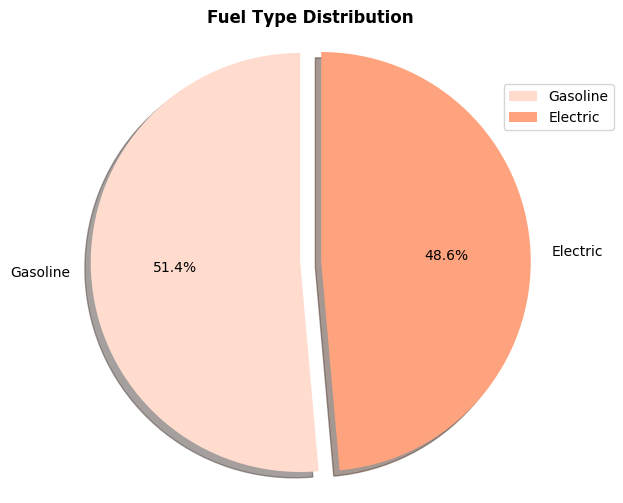

In [16]:
import matplotlib.font_manager as font_manager

plt.figure(figsize=(6, 6))

# Assuming 0 corresponds to 'gasoline' and 1 corresponds to 'electric'
fuel_type_counts = data['Fuel Type'].map({0: 'Gasoline', 1: 'Electric'}).value_counts()

# Define colors and explode
colors = ['#FFDCCE', '#FFA37E']
explode = (0, 0.1)

plt.pie(fuel_type_counts, explode=explode, labels=fuel_type_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=90, shadow=True)

# Set custom font for the title
title_font = font_manager.FontProperties(family='Verdana', style='normal', weight='semibold', size=12)
plt.title('Fuel Type Distribution', fontproperties=title_font)
plt.ylabel('')  # Remove the y-axis label

# Add legend
plt.legend(fuel_type_counts.index, loc="best", bbox_to_anchor=(0.9, 0.9))

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()


### Recommender 

In [17]:
# Function to handle existing users and predict carbon emissions
def predict_carbon_emission(user_type, username=None, start_location=None, end_location=None):
    if user_type.lower() == "existing":
        if username is None:
            username = input("Enter your username: ")

        user_info = data[data['User Name'] == username].iloc[0]
        start_location = user_info["Start Location"]
        end_location = user_info["End Location"]
        print(f"Existing user: {username}, Start Location: {start_location}, End Location: {end_location}")
        mode_of_transport = user_info["Mode of Transport"]
        fuel_type = user_info["Fuel Type"]
        distance = user_info["Distance Traveled (In Miles)"]
        frequency = user_info['Frequency(Per Week)']
        emission = user_info["Monthly Emissions (kg CO2)"]

        print(f"Monthly Emissions (kg CO2): {emission}")
        frequency_per_month = 4  # Assuming 4 weeks in a month
        total_distance = distance * frequency * frequency_per_month
        emission_factors = emission_factors_car if mode_of_transport == 1 else emission_factors_bike
        acceptable_range = 0.158 * total_distance if mode_of_transport == 1 else 0.18 * total_distance
        print(f"Acceptable range of Monthly Emissions (kg CO2): {acceptable_range}")

        if emission > acceptable_range:
            print(f"Consider using Public Transport to reduce carbon emissions.")
        else:
            print(f"Your carbon emissions are within an acceptable range.")

        # Check for carpooling possibilities
        carpool_suggestions = []
        for _, existing_user_info in data[data['User Name'] != username].iterrows():
            if existing_user_info["Start Location"] == start_location and existing_user_info["End Location"] == end_location:
                carpool_suggestions.append(existing_user_info['User Name'])

        if carpool_suggestions:
            carpool_suggestions_str = ', '.join(carpool_suggestions)
            print(f"Carpooling suggestion: You can carpool with {carpool_suggestions_str}. If you want to decrease your Co2 Footprint")

    
    elif user_type.lower() == "new":
        mode_of_transport = input("Enter mode of transport (Car, Bike): ")
        distance = float(input("Enter distance traveled in miles: "))

        while distance == 0:
            print("Distance is zero. Please provide a valid distance for accurate predictions.")
            distance = float(input("Enter a valid distance traveled in miles: "))
        fuel_type = input("Enter fuel type (e.g., gasoline, electric): ")
        frequency = int(input("Enter frequency per week:"))
        fuel_efficiency = int(input("Fuel efficiency:"))

        fuel_type_encoded = label_encoders['Fuel Type'].transform([fuel_type])[0]
        total_distance = distance * frequency * 4  # Assuming 4 weeks in a month

        if mode_of_transport.lower() == 'car':
            emission_factors = emission_factors_car
            acceptable_range = 0.158 * total_distance
        elif mode_of_transport.lower() == 'bike':
            emission_factors = emission_factors_bike
            acceptable_range = 0.18 * total_distance

        feature_names = ['Distance Traveled (In Miles)', 'Fuel Type', 'Fuel Efficiency']
        X_test_for_prediction = pd.DataFrame([[total_distance, fuel_type_encoded, fuel_efficiency]],
                                             columns=feature_names)
        

        carbon_emission = model_decision_tree.predict(X_test_for_prediction)[0]
        print("Predicted Carbon Emission:", carbon_emission)

        carpool_suggestions = []
        for _, existing_user_info in data.iterrows():
            if existing_user_info["Start Location"] == start_location and existing_user_info[
                "End Location"] == end_location:
                carpool_suggestions.append(existing_user_info['User Name'])

        if carpool_suggestions:
            carpool_suggestions_str = ', '.join(carpool_suggestions)
            print(f"Carpooling suggestion: You can carpool with {carpool_suggestions_str}.")
            print(f"or")
            
            
        if fuel_type.lower() == "gasoline" and carbon_emission > acceptable_range:
            print(
                f"Consider using Public Transport to reduce carbon emissions for your gasoline vehicle. (Emission Factor: {emission_factors.get(fuel_type.lower(), 'Unknown')})\nPredicted Carbon Emission: {carbon_emission:.2f} kg CO2")
            print(f"Acceptable range of Monthly Emissions (kg CO2): {acceptable_range}")
        elif fuel_type.lower() == "electric" and carbon_emission > acceptable_range:
            print(
                f"Consider using Public Transport to reduce carbon emissions for your electric vehicle. (Emission Factor: {emission_factors.get(fuel_type.lower(), 'Unknown')})\nPredicted Carbon Emission: {carbon_emission:.2f} kg CO2")
            print(f"Acceptable range of Monthly Emissions (kg CO2): {acceptable_range}")
        else:
            # Emissions are within an acceptable range
            print(
                f"Your carbon emissions are within an acceptable range. (Emission Factor: {emission_factors.get(fuel_type.lower(), 'Unknown')})\nPredicted Carbon Emission: {carbon_emission:.2f} kg CO2")
            print(f"Acceptable range of Monthly Emissions (kg CO2): {acceptable_range}")

# Example usage
user_type_input = input("Are you an existing user or a new user? Enter 'existing' or 'new': ")

if user_type_input.lower() == "existing":
    username_input = input("Enter your username: ")
    predict_carbon_emission("existing", username=username_input)
else:
    start_location_input = input("Enter start location: ")
    end_location_input = input("Enter end location: ")
    predict_carbon_emission("new", start_location=start_location_input, end_location=end_location_input)


Are you an existing user or a new user? Enter 'existing' or 'new': existing
Enter your username: Kim Smith
Existing user: Kim Smith, Start Location: Sunnyvale, End Location: San Francisco
Monthly Emissions (kg CO2): 209.52
Acceptable range of Monthly Emissions (kg CO2): 79.0
Consider using Public Transport to reduce carbon emissions.
Carpooling suggestion: You can carpool with Robert Downey, Kai Le, Jacob Cheng, Peyton Edwards, Theodore Bui, Jack Rogers, Naomi Lee, Lucas Lo, Josiah Ramos, Kai Singh, Olivia Vazquez, Natalie Stewart, Jayden Rogers, Nolan Garcia, Mateo Jordan, Emilia Chung, Abigail Zhu, Ariana Santiago, Nora Butler, Gianna Cruz, Addison Li, Riley Vega, Scarlett Rodriguez, Zoey Lu, Santiago f Turner, Vivian Jackson, Everleigh Kumar, Sophia Collins, Raelynn Her, Christian Ayala, Maria Barnes, Matthew Jackson, Dylan Simmons, Emery Flores, Everleigh Castillo, Anna Carrillo, Hunter Molina, Gianna Jimenez, Lydia Chu, Colton Bui. If you want to decrease your Co2 Footprint
